In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
test_ids=test["PassengerId"]

In [6]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train.interpolate(limit_direction="both",inplace=True)

In [6]:
test.interpolate(limit_direction="both",inplace=True)

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.726061,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.902353,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
num=train[["Age", "SibSp", "Parch", "Fare"]]
cat =train[["Survived", "Pclass", "Sex", "Embarked"]]

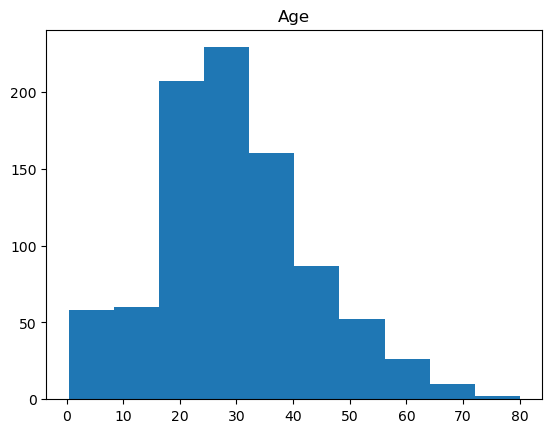

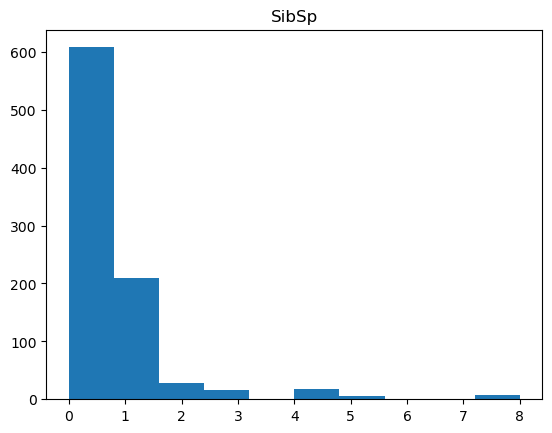

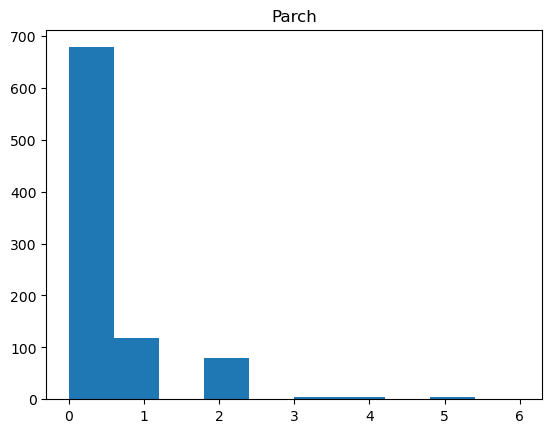

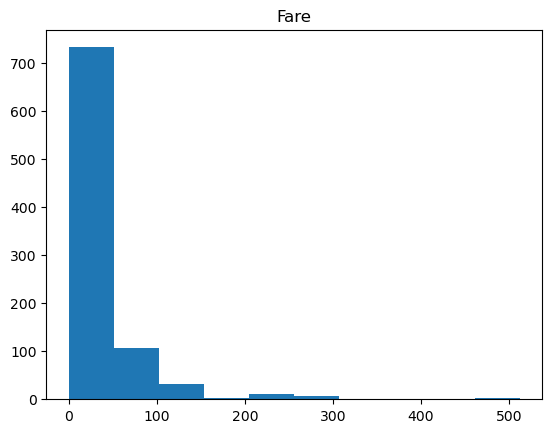

In [9]:
for i in num.columns:
    plt.hist(x=num[i])
    plt.title(i)
    plt.show()

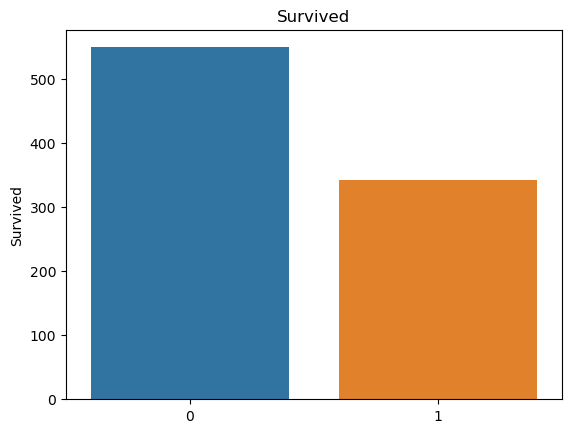

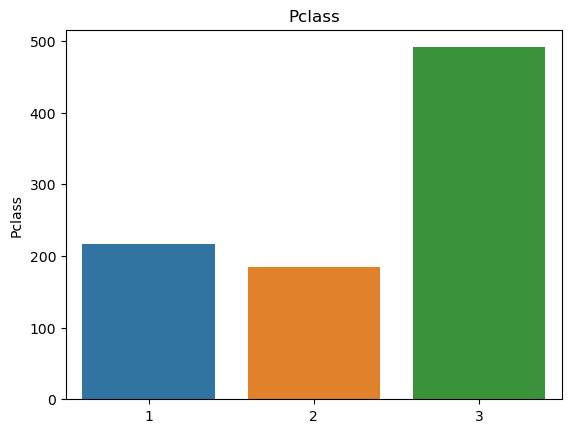

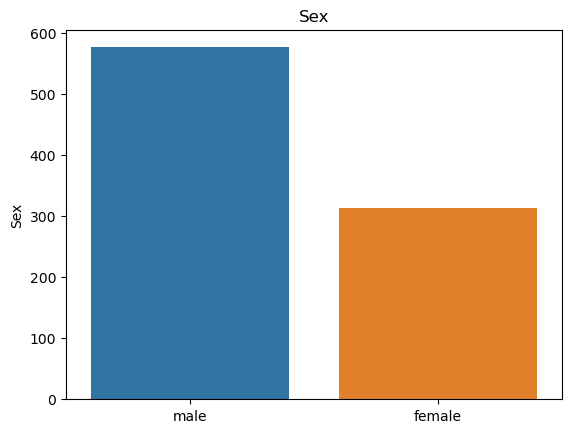

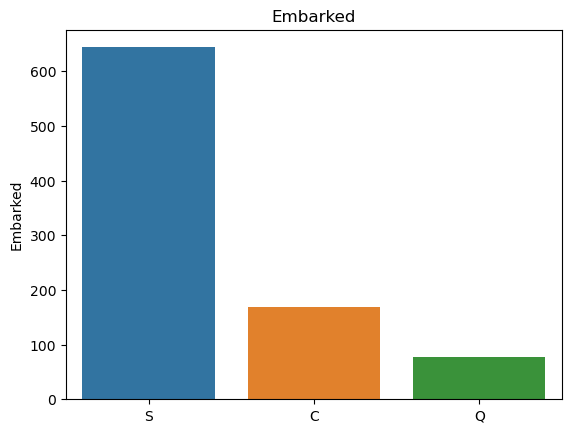

In [10]:
for i in cat.columns:
    sns.barplot(x=cat[i].value_counts().index, y=cat[i].value_counts()).set_title(i)
    plt.show()

In [11]:
pd.pivot_table(train, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.407787,22.117887,0.329690,0.553734
1,28.631711,48.395408,0.464912,0.473684


In [12]:
print(pd.pivot_table(train, index = "Survived", columns= 'Pclass', values ="Ticket", aggfunc="count"))
print()
print(pd.pivot_table(train, index = "Survived", columns= 'Sex', values ="Ticket", aggfunc="count"))
print()
print(pd.pivot_table(train, index = "Survived", columns= 'Embarked', values ="Ticket", aggfunc="count"))
print()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



In [13]:
def clean(data):
    data= data.drop(["Ticket", "Name", "PassengerId", "Cabin"], axis=1)
    data.Embarked.fillna("U", inplace=True)
    return data
train= clean(train)
test= clean(test)

In [14]:
data = preprocessing.LabelEncoder()
columns=["Sex", "Embarked"]
for col in columns:
    train[col]= data.fit_transform(train[col])
    test[col]= data.fit_transform(test[col])
    print(data.classes_)
    
train.head()

['female' 'male']
['C' 'Q' 'S']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [15]:
y= train["Survived"]
x=train.drop("Survived", axis=1)

x_train, x_val, y_train, y_val =train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(x_train, y_train)

In [17]:
predictions = clf.predict(x_val)
accuracy_score(y_val, predictions)

0.8100558659217877

In [18]:
submission_preds = clf.predict(test)

In [196]:
df = pd.DataFrame({"PassengerId":test_ids.values,
                  "Survived":submission_preds,
                  })

In [197]:
df.to_csv("submission.csv", index=False)